In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


# 1절. 머신러닝으로 AI 모델링하기
먼저 머신러닝의 지도학습 모델인 회귀와 분류의 개념을 복습해 봅니다. 다음 표와 같이 수치형 데이터를 예측하는 모델을 회귀라고 하며, 'Y 또는 N', '고양이 또는 개'와 같이 범주형 데이터를 예측하는 모델을 분류라고 합니다.



## 1. 사이킷런 라이브러리
개발할 때 바닥부터 진행하는 경우는 거의 없습니다. 특히 복잡한 알고리즘일수록 더더욱 만들기 어렵고 성능을 보장할 수도 없습닏. 이럴 때 활용하는 것이 라이브러리입니다.<BR>
머신러닝도 대표적인 라이브러리가 있는데, 그중 파이썬에서 활용 가능한 사이킷런은 오픈소스로 개발되어 개인, 회사와 관계없이 누구나 무료로 사용할 수 있습니다. <BR>
특히 사이킷런에서 사용되는 학습 및 에측 패턴을 이해하면 Xgboost, LGBM 등 현업에서 활용하는 라이브러리도 쉽게 변경하여 적용할 수 있습니다. 따라서 사이킷런 기반의 학습은 초급 데이터 분석가가 활용하기 좋은 라이브러리입니다. 

사이킷런 라이브러리 기반 학습 및 예측 패턴의 4단계에서 실행 명령어의 예시는 다음과 같습니다. 
> 1. 불러오기 : from sklearn.ensemble import RandomForestClassifier
> 2. 생성 : clf = RandomForestClassifier(random_state=0)
> 3. 학습 : clf.fit(X,y)
> 4. 예측 : clf.predict(X)

이 4단계로 머신러닝 모델 개발이 완료되는데, 모델을 적용하는 방법은 매우 쉽고 간결합니다. 4단계를 바탕으로 머신러닝의 대표적인 알고리즘별 특성과 사용 방법을 알아봅니다. 

## 2. 선형 회귀
### 1) 선형 회귀 이해기기
주식 같은 시계열 데이터의 그래프를 분석할 때 많이 쓰는 용어 중에 ‘추세선’이 있습니다. 추세선은 데이터의 추세를 그래프로 표현하여 이후의 패턴을 예측하는데 활용되는데, 이러한 통계 분석 방법론을 회귀 분석이라고 합니다. <br>
우리가 학습해야 하는 머신러닝은 주어진 데이터를 바탕으로 label(Y)과 feature(X)의 관계를 가장 잘 설명하는 모델을 만드는 것이고, 그 모태가 되는 알고리즘, 즉 최적의 직선을 기반으로 예측하는 방법론이 선형 회귀(Liner Regression)입니다.<br> 






다음은 사이킷런의 선형 회귀 모델에 대한 설명입니다. 예측할 값을 구하는 산식은 ‘ax+b’와 같은 1차 방정식으로 구성되어 있습니다.<br> 
알고리즘을 쉽게 파악하기 위해 1차방정식을 기준으로 데이터를 만들어 정확히 예측하는지 살펴봅니다. 선형 회귀는 선형성을 가진 알고리즘으로 인해 기울기와 절편을 알 수 있고, 해당 변수를 바탕으로 기계가 설명하고자 하는 방향을 확인할 수 있습니다. 

실습을 통해 선형 회귀를 알아봅니다. 선형 회귀 알고리즘은 sklearn의 linear_model 서브패키지에서 제공하는 LinearRegression 클래스를 활용할 수 있습니다. LinearRegression 클래스는 다음과 같은 하이퍼파라미터를 입력받습니다. 

> 하이퍼파라미터
> <div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
    * fit_intercept：절편값의 계산 여부 지정</div>

학습이 끝나면 모델은 다음 속성을 가집니다. 
* coef_: 학습된 모델 특성의 가중치 추정값
* intercept_: 학습된 모델의 절편 추정값

#### (1) 데이터 구성하기
데이터는 y=4x+7이고, x에 입력할 데이터는 1~10입니다. y가 4x+7로 출력된 결과이기에 해당 데이터를 학습한 모델이 핵심 숫자 2개(4와 7)를 기울기(coef) 및 절편(intercept)으로 지니는 모델이라면 학습이 잘 되었다고 판단할 수 있습니다. 

In [2]:
#pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2023)

x=[]
y=[]
for i in range(1,11):
    x.append(i)
    y.append(4*i+7)

print('x : ', x)
print('y : ', y)

x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


#### (2) 선형 회귀 학습기기

In [4]:
#pip install scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x = np.array(x).reshape(-1, 1)

print("학습 데이터 확인")
print('x : ', x)
print('x.shape : ', x.shape)

학습 데이터 확인
x :  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape :  (10, 1)


In [6]:
reg.fit(x,y)

print(f'''기울기 및 절편 확인 coef={reg.coef_}, intercept={reg.intercept_} ''')

coef_intercept = x*reg.coef_[0]+reg.intercept_
print("계산 결과")
print(coef_intercept)

기울기 및 절편 확인 coef=[4.], intercept=6.9999999999999964 
계산 결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


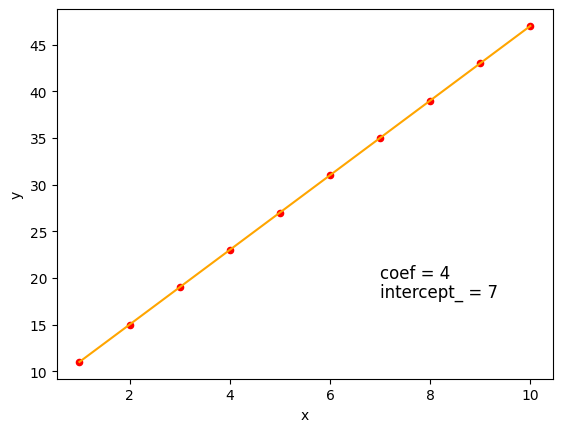

In [7]:
plt.scatter(x, y, color = 'r', s = 20)

plt.plot(x, coef_intercept, color = 'orange')

plt.text(7, 20, 'coef = %.0f'%reg.coef_[0], size=12)

plt.text(7, 18, 'intercept_ = %.0f'%reg.intercept_, size=12)

plt.xlabel('x')

plt.ylabel('y')
plt.show()

시각화 결과를 보면 선형 회귀 학습 결과가 잘 반영된 것을 확인할 수 있습니다. <br>
머신러닝은 어떤 방법으로 4와 7의 값이 정답인지 확인할 수 있을까요? 가장 확실한 방법은 모든 숫자를 대입해 보는 것입니다. 위의 예시에서는 기울기로 사용될 변수가 1개뿐이므로 대입을 많이 할 필요는 없지만 여러 개의 Feature가 존재한다면 기하급수적으로 연산이 늘어납니다. 

이럴 때 빠르게 최적의 값을 찾아가는 개념이 Gradient Descent 알고리즘입니다(해당 부분은 딥러닝 섹션에서 더 자세히 다룹니다).

### 3) 사례기반 선형 회귀 모델링
문제를 정의하는 과정을 포함한 사례를 기반으로 선형 회귀 모델을 활용해 모델링을 해봅니다. 건강검진정보 데이터를 적용합니다. 데이터는 공공데이터포털(data.go.kr)의 ‘국민건강보험공단_건강 검진~~~.csv를 사용합니다. 
> 데이터 출처 :  https://www.data.go.kr/data/15007122/fileData.do



키, 몸무게 등 다양한 데이터 중에 추론을 통해 예측했을 때 유의미한 결과를 가져올만한 변수를 찾아봅니다. <br>
콜레스테롤 중 LDL 콜레스테롤은 건강에 좋지 않은 수치이기에 건강검진에서 필요할 확률이 매우 높습니다. 이에 건강검진 데이터를 바탕으로 LDL 콜레스테롤의 수치를 예측해 보는 선형 회귀 모델을 개발한다면 건강검진 수검자나 결과를 분석하는 의사에게 도움이 될 것입니다. 따라서 해당 결과를 도출하는 모델을 간단히 만들어봅니다.<br> 
우선 간단한 가설로 데이터 중에 치아 관련 문항은 콜레스테롤과 상관 없을 것이라는 가설을 세워서 실습을 진행하고 가중치를 확인해 봅니다. 모델링에 앞서 모델링을 위한 데이터를 전처리합니다. 

#### (1) 데이터 전처리하기

In [8]:
import pandas as pd

df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding='cp949')

pd.set_option('display.max_columns', None)

df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [9]:
df.drop(["치아우식증유무", '치석', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진 수검여부'], axis=1, inplace=True)

print("기준년도 칼럼 확인")
df.기준년도.value_counts()

기준년도 칼럼 확인


기준년도
2020    1000000
Name: count, dtype: int64

In [10]:
print("가입자 일련번호 칼럼 확인")
df["가입자 일련번호"].value_counts()

가입자 일련번호 칼럼 확인


가입자 일련번호
1          1
666658     1
666660     1
666661     1
666662     1
          ..
333338     1
333339     1
333340     1
333341     1
1000000    1
Name: count, Length: 1000000, dtype: int64

In [11]:
print("성별코드 칼럼 확인")
df.성별코드.value_counts()

성별코드 칼럼 확인


성별코드
1    510689
2    489311
Name: count, dtype: int64

In [12]:
df.drop(["기준년도", '가입자 일련번호', '데이터 공개일자', '성별코드', '시도코드'], axis=1, inplace=True)

test = df[df['LDL 콜레스테롤'].isnull()]

train = df.dropna(axis=0)
# len(train)
print("학습 데이터 확인")
train.head(1)

학습 데이터 확인


,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0


In [51]:
y = train['LDL 콜레스테롤']

x = train.drop('LDL 콜레스테롤', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

print("학습/검증 데이터 확인")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

학습/검증 데이터 확인
(262749, 18) (262749,) (129415, 18) (129415,)


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # 결측값을 평균으로 대체
X_train = imputer.fit_transform(X_train)
y_train.fillna(y_train.mean(), inplace=True)  # 결측값을 평균으로 대체

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

print(f'''기울기 및 절편 확인
기울기 확인 coef = {reg.coef_}
절편 확인 intercept = {reg.intercept_}''')

기울기 및 절편 확인
기울기 확인 coef = [ 0.10940698  0.01482723  0.03846911  0.04390587 -0.01075239 -0.00400628
 -0.00250987  0.96960416 -0.17471532 -0.7285143   0.14793707  0.02093034
  0.30343003 -0.01334047  0.01410607 -0.00855896  0.26395722 -0.70237274]
절편 확인 intercept = -22.424253230418515


In [15]:
# # 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
# print("전체에 대해서 가중치 확인")
# for index, columns in enumerate(X_train.columns):
#     print(f"{columns} = {reg.coef_[index]}")
print("전체에 대해서 가중치 확인")

# DataFrame인지 ndarray인지 확인
if hasattr(X_train, 'columns'):
    # DataFrame인 경우
    for index, column in enumerate(X_train.columns):
        print(f"{column} = {reg.coef_[index]}")
else:
    # ndarray인 경우
    for index in range(X_train.shape[1]):
        print(f"Feature {index} = {reg.coef_[index]}")


전체에 대해서 가중치 확인
Feature 0 = 0.1094069781390853
Feature 1 = 0.014827231815311537
Feature 2 = 0.03846910648118326
Feature 3 = 0.04390587116959645
Feature 4 = -0.010752389060191122
Feature 5 = -0.004006282687844007
Feature 6 = -0.00250987175812648
Feature 7 = 0.9696041571709941
Feature 8 = -0.1747153218786991
Feature 9 = -0.7285142950308025
Feature 10 = 0.14793707336766299
Feature 11 = 0.020930335819270077
Feature 12 = 0.3034300294921596
Feature 13 = -0.013340474467645486
Feature 14 = 0.014106072133288211
Feature 15 = -0.008558956086860943
Feature 16 = 0.26395721807757877
Feature 17 = -0.7023727367515122


#### (3) 예측을 통한 최종 검증하기

In [16]:
y_pred=reg.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'''주요 Feature 삭제 전 rmse = {round(rmse,3)}''')

주요 Feature 삭제 전 rmse = 8.127


C:\anaconda3\envs\aitensor\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


앞선 (2) 선형 회귀 모형을 학습 및 추론한 결과를 보면 '총 콜레스테롤/HDL콜레스테롤/음주여부'가 영향을 많이 주는 것을 알 수 있습니다. 가중치가 큰 콜레스테롤 관련 Feature를 삭제한 후 독립변수의 가중치가 어떻게 변하는지 확인해 봅니다. 

#### (4) 가중치의 의미 확인하기

In [17]:
train.columns

Index(['연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부'],
      dtype='object')

In [18]:
# 주요 Feature 삭제하기
x = x.drop(['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤'],axis = 1)
# scikit learn 예시 코드 비율 대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

#### (5) 선형 회귀 모델 재학습하기

In [19]:
# 선형회귀 재생성 및 학습하기
lr = LinearRegression()
lr.fit(X_train,y_train)
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print(f'''coef
{lr.coef_}
intercept
{lr.intercept_}''')

coef
[-2.42029175e+00 -3.33193684e-01 -2.06625915e-04 -6.04430610e-02
 -1.12762074e-01  2.60023059e-01 -1.40142661e-01  3.98600794e+00
 -1.43222741e+00 -3.09969695e-01 -5.96480461e-02  4.51315922e-02
 -2.61611789e-02 -3.08419949e+00 -1.22509065e+00]
intercept
164.22902318120208


(6) 가중치 비교하기

In [20]:
# 검증 데이터로 예측하기
y_pred = lr.predict(X_test)
# 각각 데이터에 대해 가중치(또는 회귀계수) 확인하기
print("가중치 확인")
for index ,columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

가중치 확인
연령대 코드(5세단위) = 0.1094069781390853
신장(5Cm단위) = 0.014827231815311537
체중(5Kg 단위) = 0.03846910648118326
허리둘레 = 0.04390587116959645
수축기 혈압 = -0.010752389060191122
이완기 혈압 = -0.004006282687844007
식전혈당(공복혈당) = -0.00250987175812648
혈색소 = 0.9696041571709941
요단백 = -0.1747153218786991
혈청크레아티닌 = -0.7285142950308025
(혈청지오티)AST = 0.14793707336766299
(혈청지오티)ALT = 0.020930335819270077
감마 지티피 = 0.3034300294921596
흡연상태 = -0.013340474467645486
음주여부 = 0.014106072133288211


In [21]:
# 주요 Feature 삭제 후 RMSE 확인하기
rmse_2 = mean_squared_error(y_test, y_pred, squared=False)
# 가중치가 큰 특성을 삭제 했을 때 영향을 많이 받는지 확인하기
print(f'''주요 Feature 삭제 후 rmse = {round(rmse_2,3)}''')

주요 Feature 삭제 후 rmse = 38.847


선형 회귀 기반의 간단한 모델을 학습하였습니다. Feature의 존재 여부에 따라 rmse의 값이 매우 크게 차이가 나는 것을 확인할 수 있습니다. 또한 선형성이 있기에 절편과 기울기를 확인하여 모텔에 대해 어떤 Feature가 얼마나 영향을 주었는지 확인할 수 있습니다. 

## 3. 로지스틱 회귀
### 1) 로지스틱 회귀 이해하기
로지스택 회귀 모델은 시그모이드 함수를 사용하여 데이터를 설명하는 최적의 선으로 답을 찾는 알고리즘입니다. 다만, 이름에 회귀가 들어가 있으나 분류에 사용되는 알고리즘입니다. <br>
로지스틱 회귀 알고리즘의 산식은 다음과 같습니다. 

우선 코드를 통해 시그모이드 함수를 만들어 봅니다. 

#### (1) 시그모이드 함수 만들기

In [22]:
# numpy 라이브러리 및 그래프 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 작성하기
def sigmoid(x):
    # nnumpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return 1 / (1 + np.exp(-x)) 

# 함수 테스트용 데이터 생성하기
test = np.array([-1, 0, 1])

# 작성된 함수 확인하기
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


#### (2) 시그모이드 함수 그래프 그리기

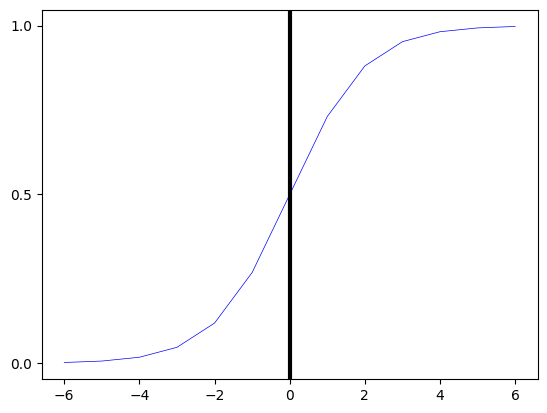

In [23]:
# 그래프 적용을 위한 데이터 만들기
sigmoid_x = range(-6, 7)
sigmoid_y = sigmoid(np.array(sigmoid_x))
# 선 그래프 그리기
plt.plot(sigmoid_x , sigmoid_y, color = 'blue',linewidth = 0.5)
# 백 그라운드 모눈 종이 설정하기
plt.rcParams['axes.grid'] = True
# 라인 굵기 설정하기
plt.axvline(x=0, color='black', linewidth=3)
# y 축 범위 설정하기 
plt.yticks([0,0.5,1])
plt.show()

이 그래프를 통해 -6부터 6까지 입력값들을 0과 1 사이의 값으로 변환해 주는 로지스틱 함수가 잘 구현된 것을 확인할 수 있습니다. 

### 2) 로지스틱 회귀 실습하기
샘플 데이터를 통해 로지스틱 회귀 모델을 학습하고 왜 분류 문제에서 선형 회귀 모델보다 로지스틱 회귀가 더 적합한지 살펴봅니다. 로지스틱 회귀 알고리즘은 `sklearn`의 `linear_model 서브패키지`에서 제공하는 `LogisticRegression 클래스`로 활용할 수 있습니다. `LogisticRegression 클래스`는 다음과 같은 하이퍼파라미터를 입력받습니다.

> 하이퍼파라미터
> <div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
    * max_iter：알고리즘의 수렴을 위한 반복의 최대 횟수를 지정<br>
    * penalty：규제의 종류('l1', 'l2', 'elasticnet', 'none')<br>
    * C：규제의 강도를 조절하는 파라미터로 값이 클수록 규제가 약해지고 값이 작을수록 규제가 강해짐   
</div>
학습이 끝나면 객체는 다음 속성을 가집니다.
* coef_ : 학습된 모형 특성의 가중치 추정값
* intercept_ : 학습된 모델의 절편 추정값

우선 데이터를 준비합니다. 

#### (1) 데이터 구성하기

In [24]:
# 학습 데이터 생성하기
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
# 추론을 위한 데이터 생성하기
x_test = [0,1,2,18,19]
y_test =  [0,0,0,1,1]

# 학습 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)
# 추론 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

# 데이터 확인하기
print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


x_train 데이터 값이 9에서 10으로 넘어갈 때 y_train 데이터 값이 0에서 1로 변하는 데이터를 준비합니다. 이 데이터를 토대로 정말 최적의 선을 통해 분류하는지를 확인해 봅니다. 이때 앞서 설명한 사이킷런의 `LogisticRegression 클래스`를 활용하여 로지스틱 회귀를 만들어진 데이터에 적용해 봅니다.

### (2) 로지스틱 회귀 학습하기

In [25]:
#로지스틱 회귀 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 생성하기
logi_reg = LogisticRegression()
# 학습하기
logi_reg.fit(x_train, y_train)
# 역산을 위한 기울기와 절편이 있는지 확인하기
print('intercept:', logi_reg.intercept_)
print('coef:', logi_reg.coef_)

intercept: [-11.34126808]
coef: [[1.19383367]]


학습을 마친 모델의 결과에서 선형 회귀 모델과 같이 coef와 intercept을 확인할 수 있습니다. coef와 intercept를 이용하여 sigmoid 그래프를 그리고 데이터와 비교해 봅니다. 

#### (3) 로지스틱 회귀 그래프 만들기

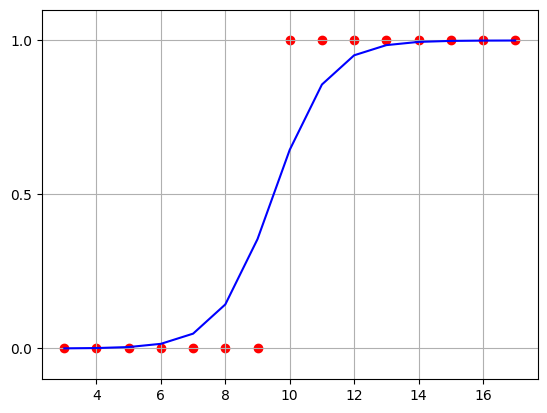

In [26]:
# 기울기와 절편을 수동으로 결과 만들기
odd = [] # 
for i in x_train:
    odd.append((logi_reg.coef_* i) + logi_reg.intercept_)
    
sigmoid_y= sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

# 역산된 그래프 표시하기
plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True 
plt.yticks([0,0.5,1])
plt.ylim([-0.1, 1.1]) # y축의 범위: [Ymin, Ymax]     
plt.show()


coef와 intercept를 이용하여 그린 sigmoid 그래프가 데이터를 잘 표현하고 있음을 확인할 수 있습니다. <br>
지금부터는 선형 회귀와 로지스틱 회귀를 비교해서 두 모델 모두 같은 선형으로 모델링을 하지만 왜 선형 회귀는 수치를 예측하는 회귀 모델에, 로지스틱 회귀는 범주형 데이터를 예측하는 분류 모델에 더 적합한지 알아봅니다. 

### 3) 로지스틱 회귀와 선형 회귀 비교하기
#### (1) 선형 회귀 모델링하기

In [27]:
# 선형회귀 함수 불러오기
from sklearn.linear_model import LinearRegression
# 선형회귀 생성하기
lr = LinearRegression()
# 학습하기
lr.fit(x_train,y_train)

# 수식 완성을 위한 coef 와 intercept 확인하기
print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

intercept: -0.4666666666666667
coef: [0.1]


(2) 선형 회귀 모델과 로지스틱 회귀 모델 비교하기

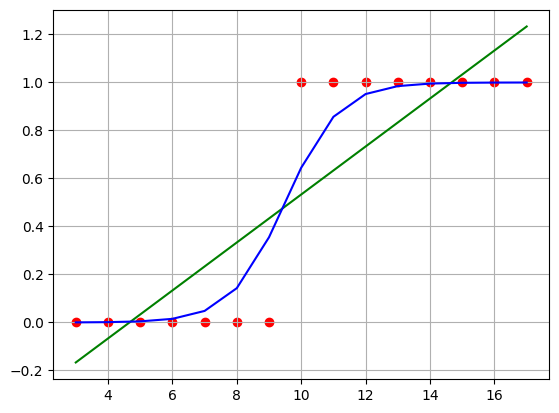

1.0
0.3981481481481479


In [28]:
coef_intercept = x_train * lr.coef_ + lr.intercept_

plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), coef_intercept, color='green')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.show()
print(logi_reg.score(x_test,y_test))
print(lr.score(x_test,y_test))

로지스틱 회귀는 Y축의 0.5(임계값 변경 가능)를 기준으로 ‘Yes  또는 No’를 구분하여 이진/다중 분류에 강한 모델을 만듭니다. 반면 선형 회귀는 직선으로만 참 거짓을 구분해야 합니다.<br>
위 학습 모델을 기반으로 예측할 때 9.5라는 데이터를 학습 모델에 넣는다면 어떤 결과가 나올까요? 아래 확인 문제의 코드로 결과를 확인하고 의미를 추론해 봅니다. 

## 4. 의사결정나무
### 1) 의사결정나무 이해하기

지금부터는 트리 기반 알고리즘을 알아봅니다. 트리 기반 모델은 기본적으로 Feature를 조건 기반으로 참 거짓으로 나눠 마치 스무고개를 하듯이 학습을 이어나갑니다. <br>
예를 들어 시장에서 물건을 구매할 때 사과, 고기, 야채를 산다고 가정합니다. 맨 처음 과일가게에 가서 ‘사과를 사면 다른 물건을 전부 살 수 있을까’라는 고민을 하게 될 것입니다. 내가 가진 자원(Data)과 각 물건의 중요도(Weight)를 기반으로 구매 여부(Label)을 비교하면서 고기와 야채를 살 것입니다. 최종적으로 사과를 구매하는 단계까지 과정을 보면 사람이 의사결정을 하는 것과 유사합니다.

스무고개와 비슷한 의사결정나무(Decision Tree)의 장점은 그림에서 보는 것처럼 트리를 따라가다 보면 머신러닝이 어떻게 학습하여 결론을 내는지 설명이 가능하다는 것입니다. 또한 회귀 기반 모델이 아니기에 선형성이 떨어져 수학적 가정이 불필요합니다. 다만 선형성이 없기에 트리를 깊게 만들면 과대적합 발생 확률이 높아집니다.
<div style="display:table; border-collapse:collapse; width:100%; text-align:center;">
	<div style="display:table-row; background-color:#d9e2f3; font-weight:bold">
		<div style="display:table-cell; border:1px solid black; padding:5px;">장점</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">단점</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">@결과에 대한 설명이 가능합니다(해석 가능)<br>
            @선형성이 업식에 수학적 가정이 불필요합니다.  <br>   
            @범주와 연속형 수치 모두 예측 가능합니다(모든 트리 가반 모델이 가능).
        </div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">@과대적합 발생 확률이 높습니다.<br>
            @트리 구조로 인한 선형성이 떨어집니다.<br>
            @출력변수가 연속형인 회귀 모델에서는 예측력이 떨어질 수 있습니다.
        </div>
	</div>
</div>

### 2) 의사결정나무 실습하기
이번에도 선형 회귀 모델에서 사용한 건강검진 데이터를 가지고 음주여부를 성별, 키, 체중 데이터를 기반으로 의사결정나무로 학습하고, 결과를 통해 의사결정나무의 원리를 알아봅니다.<p>
의사결정나무 알고리즘은 sklearn의 tree 서브패키지에서 제공하는 DecisionTreeClassifier(DecisionTreeRegressor) 클래스로 활용할 수 있습니다.<br>
DecisionTreeRegressor 클래스는 아래와 같은 하이퍼파라미터를 입력받습니다. 이때 의사결정나무는 과대적합 발생 확률이 높기에 과대적합 방지를 위한 하이퍼파라미터를 위주로 알아봅니다. 

> 하이퍼파라미터
> <div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
    * max_depth：깊어질 수 있는 최대 깊이, 과대적합 방지용(default=None)<br>
    * max_features：최대로 사용할 feature의 개수, 과대적합 방지용<br>
    * min_samples_split：트리의 노드가 가지고 잇는 최소한의 샘플 수, (default=2, 과대적합 빙지용)</div>

#### (1) 데이터 준비하기

In [29]:
# 라이브러리 불러오기 (numpy, pandas, train_test_split)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding = 'cp949')
# 트리 예시를 만들기 위해서 일부 특성만 추출
sample_df = df[['신장(5Cm단위)','성별코드', '체중(5Kg 단위)','음주여부']]

# 샘플 데이터 중 상위 10개 추출하기
sample_df[:10]

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0
5,185,1,85,1.0
6,165,1,80,1.0
7,160,1,65,0.0
8,150,2,50,0.0
9,150,2,45,0.0


#### (2) 데이터 전처리하기

In [30]:
# info 정보로 결측치(Null) 확인하기
print("Info 정보 확인")
sample_df.info()

Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


약 100만 건의 데이터 중 음주여부 칼럼에 결측치가 일부 존재하여 196건의 데이터를 drop 처리하여 최종 학습 데이터로 준비하고, Label 데이터에 편향이 심하지 않은지 불균형 여부도 확인합니다. 

In [31]:
# 100만개 데이터 중 결측치 196개, 결측치가 포함된 행 삭제하기
sample = sample_df.dropna() 

# 결측치(Null) 다시 확인하기
print("Drop 후 Info 정보 확인")
sample.info()

Drop 후 Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [32]:
# 원-핫 인코딩을 위해 데이터를 object 형태로 변경하기
sample = sample.astype('str')

# label(결과, Y) 생성하기
y=sample.음주여부

# 음주 여부 학습 데이터 구성하기
X=sample.drop('음주여부', axis=1)

# label 데이터의 편향성 확인하기
y.value_counts()

음주여부
1.0    584685
0.0    415119
Name: count, dtype: int64

해당 데이터를 학습 데이터와 검증 데이터로 분리합니다.

In [34]:
# 학습/검증 데이터 분리하기
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=34
)

#### (3) 의사결정나무 모델링하기
의사결정나무 모델리을 위해 사이킷런의 DecisionTreeClassifier 모델을 활용합니다.

In [35]:
# 의사결정나무 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 생성하기
dt = DecisionTreeClassifier(random_state = 1001, 
                            max_depth=2
                           ) 

# 의사결정나무 학습하기
dt_model = dt.fit(x_train, y_train)

# 학습 데이터 정확도 확인하기
print("학습 정확도 = ", dt_model.score(x_train, y_train))

# 검증 데이터 정확도 확인하기
print("검증 정확도 = ", dt_model.score(x_valid, y_valid))

학습 정확도 =  0.6622549675373792
검증 정확도 =  0.6618390586164302


#### (4) 의사결정나무 그래프 그리기
graphviz 라이브러리를 활용하여 학습된 의사결정나무 모델의 그래프를 출력합니다. 

In [ ]:
# # 트리 모양 그래프 작성을 위한 라이브러리 설치하기
# !pip install graphviz

In [36]:
# 그래프 라이브러리(matplotlib.pyplot) 불러오기
import matplotlib.pyplot as plt



# 그래프 라이브러리(grphviz) 불러오기
import graphviz
# 사이킷런의 graphviz 지원 모듈 불러오기
from sklearn.tree import export_graphviz
# 그래프 생성하기
tree_graph = graphviz.Source(export_graphviz(dt_model,
                                class_names=["X","O"],
                                feature_names=[ 'height', 'sex','weight'],
                                impurity=True,
                                filled=True))

# 그래프 출력하기
# (참고) 에러 발생시 사이트 참조 : https://highschoolfree.tistory.com/76
tree_graph

# 그래프 파일 저장하기
tree_graph.render('tree_depth5', format="png")

'tree_depth5.png'

모델링한 결과를 시각화된 형태로 보면 마치 트리 구조를 가지고 있기 때문에 의사결정나무라고 불립니다.

시각화된 각 네모 칸은 노드(Node)라고 하며, 맨 처음 시작하는 노드를 나무의 뿌리라고 하여 루트 노드(Root Node)라고 합니다. 각 노드 안에는 분할 조건, 지니계수, 입력된 샘플의 수, 각 Value별 Count 등이 있습니다. 이때 노드에 분할 조건이 없으면 리프 노드(Leaf Node)라고 합니다. 시각화된 노드를 따라가다 보면 모델이 어떻게 결과를 분류하는지 확인할 수 있습니다. <br>
각각의 필드에 대한 설명은 다음과 같습니다. <br>
* Sex <= 1.5：분할 조건
* Gini = 0.486：지니계수
* Samples = 입력된 데이터의 수
* Value = 입력된 데이터에서 각 Class별 개수(분류일 때)
* Class = 리스트 내에서 가장 많은 데이터 Value

노드 맨 첫 줄에 나오는 분할 조건은 자식 노드를 만들기 위한 규칙 조건이고, 두 번째 줄의 지니계수(Geni Index)는 불순도 지표입니다. 의사결정나무는 이 지니계수를 낮추는 방향으로 가지를 분할합니다. 

### 3) 불순도 알아보기
일반적으로 다른 물질의 함량이 적은 경우 순도가 높다고 표현합니다. 불순도(Impurity)는 순도가 낮은 경우, 즉 다양한 데이터가 섞여 있는 경우를 의미합니다. <p>
다음 과일바구니 3개를 예로 들어보겠습니다. 과일바구니 1은 사과만 담긴 바구니로 순도 100%입니다. 과일바구니 2와 3은 과일이 3가지가 섞여 있습니다. 과일바구니 2보다 3이 더 복잡해 보입니다. 하지만 과일의 종류와 배치만 다를 뿐 과일 개수는 4,3,2로 동일하고 불순도 역시 같습니다. 

의사결정나무는 노드에 의해 출력된 데이터 테이블의 불순도를 줄이는 방향으로 노드를 분할해 나갑니다. 이러한 불순도를 측정하는 대표적인 지표로 지니계수가 있습니다.<br>
지니계수는 불순도를 측정하는 지표로서, 데이터의 통계적인 분산의 정도를 정량화해서 표현합니다. 지니계수의 공식은 다음과 같습니다. 노드 분할 조건에 의해 분할된 데이터의 불순도를 지니계수로 계산하고, 불순도를 줄이는 조건을 최종적으로 선택합니다. 

$$Gini=1-\sum_{}{}_ip^2_i$$

지니계수의 이해를 돕기 위해 에제 데이터를 생성하고 실습을 진행합니다.<br>
과일바구니 2에서 3개의 레이블(사과, 바나나, 복숭아) 각각이 전체에서 차지하는 비율을 계산합니다. 사과는 2/9, 바나나는 4/9, 복숭아는 3/9입니다. 해당 비율을 모두 제곱하여 더한 후 전체의 1에서 빼줍니다. 지니계수 계산은 1-[(2/9)$^2$+(4/9)$^2$+(3/9)$^2$]입니다. 아래 실습을 통해 지니계수 함수를 생성하고 각 과일바구니별 지니계수를 계산해 봅니다. <br>

In [38]:
# 불순도 함수 생성하기
def gini(x):
    n = x.sum() 
    gini_sum = 0
    for key in x.keys():
        gini_sum = gini_sum  +  (x[key] / n ) * (x[key] / n )
    gini = 1 - gini_sum
    return gini

# 데이터 준비하기(불순도 예시)
과일바구니1 = ['사과']*9
과일바구니2 = ['사과', '바나나','사과', '바나나','바나나','바나나', '복숭아','복숭아','복숭아']
과일바구니3 = ['사과', '바나나','사과', '바나나','사과','복숭아', '복숭아','사과','복숭아']

print(round(gini(pd.DataFrame(과일바구니1).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니2).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니3).value_counts()),3))

0.0
0.642
0.642


결과를 확인해 보면, 모두 사과로 구성된 바구니가 불순도 0으로 가장 낮고, 3가지 종류의 과일이 섞여 있는 바구니는 불순도가 0.642로 높은 것을 확인할 수 있습니다.<br>
의사결정나무는 지니계수와 같은 불순도 지표를 기반으로 각 노드에서 불순도를 최소화하는 최적의 불할 조건을 구하며 데이터를 학습해 나갑니다. 

## 5. 앙상블
앙상블(Ensemble)이란 다수의 기본 모델(base model)을 생성하고 결합하여 하나의 새로운 모델(ensemble model)을 생성하는 것입니다. 앙상블 모델은 여러 모델을 결합하기 때문에 단일 모델에 비해 일반적으로 성능이 우수합니다. 또한 편향과 분산을 모두 적절히 고려하기 때문에 과적합(또는 과소적합) 방지에 용이합니다. 앙상블을 학습할 때 ‘어떤 모델을 사용할 것인지’와 ‘어떻게 결합할 것인지’를 고려해야 합니다.<br>
먼저 어떤 모델을 사용할 것인지를 고려하여 성능 개선에 효과적인 모델을 선택해서 결합합니다. 앙상블 모델 중 대표적인 것이 랜덤 포레스트(Random Forest)와 그래디언트 부스팅(Gradient Boosting)입니다. 해당 모델은 의사결정나무를 기본 모델로 결합한 알고리즘입니다. <br>
또한 어떻게 결합할 것인지를 고려하여 성능 개선에 효과적인 방법을 선택해야 합니다. 모델을 결합하는 앙상블 기법에는 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)이 있습니다. 랜덤 포레스트는 의사결정나무를 병렬로 결합한 배깅모델이며, 그래디언트 부스팅은 의사결정나무를 순차적으로 결합한 부스팅 모델입니다. 

### 1) 보팅 이해하기
보팅(Voting)은 각각 다른 알고리즘을 이용한 모델을 결합하는 방식이며 여러 모델의 결과를 기반으로 투표에 의해 결과를 도출합니다. 보팅은 하드 보팅과 소프트 보팅으로 구분합니다. <br>
하드 보팅(Hard Voting)은 각 모델의 결과 중 가장 많이 분류(다수결)된 결과로 최종결과를 선정하는 방법입니다. 아래 그림에서 모델 1은 사과, 모델 2는 바나나, 모델 3은 사과로 분류했습니다. 이때 하드 보팅 기반 앙상블 모델은 3개의 모델 중 과반 이상(모델1, 모델2)이 분류한 값인 사과로 최종 결괏값을 내보냅니다. 

반면 소프트 보팅(Soft Voting)은 각 모델별 예측한 확률값의 평균으로 최종값을 선정하는 방법입니다. 아래 그림에서 각 모델은 각 카테고리별 예측 확률을 출력하는 것을 확인할 수 있습니다. 이때 소프트 보팅 기반 앙상블 모델은 3개의 모델이 출력한 각 카테고리의 확률값 평균으로 최종 확률값을 계산하고, 최종 확률값이 가장 높은 바나나(0.7)를 출력합니다. 

### 2) 배깅 이해하기
배깅(Bagging)은 ‘bootstrap aggregating’의 줄임말로, 부트스트랩 기반 샘플링 기법을 통해 하나의 알고리즘을 학습하여 생성된 여러 모델의 결과를 결합하는 알고리즘입니다. 부트스트랩은 원본 데이터에서 샘플을 여러 번 복원 추출하는 과정을 반복하는 샘플링 방법입니다. 



배깅 기반 알고리즘은 다음과 같은 순서로 진행됩니다. 먼저, 학습 데이터로부터 부트스트랩 샘플링을 진행하여 부트스트랩 데이터를 생성합니다. 그리고 각 부트스트랩 데이터로 다수의 개별 모델을 학습합니다. 마지막으로 최종 예측을 이해 보팅(Voting)을 진행합니다. 배깅은 복원 샘플링을 통해 최종 모델의 분산을 줄여줌으로써 예측력을 향상하며, 병렬 학습이 가능하다는 장점이 있습니다. 배깅의 대표적인 알고리즘으로 트리 기반의 랜덤 포레스트가 있습니다. 

### 3) 부스팅 이해하기
부스팅(Boosting)은 예측력이 약한 모델 여러 개를 순차적으로 연결하여 예측력이 강한 모델을 만드는 앙상블 방법입니다. 부스팅은 모델을 직렬로 결합하여 앞선 모델이 예측한 것 중 틀린 데이터에 가중치를 부여하여 틀린 데이터를 더 잘 맞히도록 학습합니다. 

부스팅 기반 알고리즘은 위와 같은 순서로 진행됩니다. 먼저 학습 데이터의 관측치를 동일한 가중치로 세팅하여 학습을 진행하고 모델 예측을 수행합니다. 모델 예측에 의해 오분류된 관측치에는 높은 가중치를 부여하고, 정분류된 관측치에는 낮은 가중치를 부여하여 학습 데이터를 다시 샘플링하고 학습을 진행하는 과정을 반복합니다. 마지막으로 각 모델의 예측 결과를 결합할 때 각 모델에 가중치를 주어 가중 평균을 계산하는 방식으로 최종값을 출력합니다. <br>
부스팅의 대표적인 모델로는 아다부스트(Adaboost), 그래디언트 부스팅(Gradient Boosting), 엑스지부스트(XGBoost), 라이트지비엠(LightGBM)이 있습니다. 


## 6. 랜덤 포레스트
### 1) 랜덤 포레스트 이해하기
랜덤 포레스트(Random Forest)는 이름에서 알 수 있듯이 의사결정나무를 다수(숲)로 학습시켜 그 결과를 종합하는 배깅 기반의 앙상블 알고리즘입니다. 의사결정나무를 단일 모델로 추출할 경우 과대적합이 발생할 수 있지만, 이를 보완한 랜덤 포레스트는 다수의 나무를 구성함으로써 과대적합을 방지할 수 있습니다. 

### 2) 랜덤 포레스트 실습하기
의사결정나무와 랜덤 포레스트 2가지 모델을 만들고 비교해서 모델별 특징과 학습 방법을 알아봅니다.  랜덤 포레스트 알고리즘 sklearn의 ensemble 서브패키지에서 제공하는 RandomForestClassifier(RandomForestRegressor) 클래스로 활용할 수 있습니다. RandomForestClassifier클래스는 다음과 같은 하이퍼파라미터를 입력받습니다. 

> 하이퍼파라미터
> <div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
    * max_depth：깊어질 수 있는 최대 깊이, 과대적합 방지용(dafault=None)<br>
    * n_estimators：앙상블하는 트리의 개수 dafault=100<br>
    * max_features：최대로 사용할 feature의 개수, 과대적합 방지용<br>
    * min_samples_split：트리가 분할할 때 최소 샘플의 개수, default=2, 과대적합 방지용
</div>

하이퍼파라미터를 적용하면 의사결정나무에서 과대적합을 방지하며 시험 데이터세트(test dataset)의 결과가 더 나아지게 유도할 수 있습니다. 최적의 튜닝 방법은 ‘성능 향상 부분’에서 자세히 다룹니다. 랜덤 포레스트 모델 학습을 실습해 보면서 의사결정나무를 함께 학습하여 성능의 차이를 살펴봅니다. 

#### (1) 데이터 준비하기

In [39]:
# tensorflow 라이브러리 설치하기
#!pip install tensorflow --user

# tensorflow에서 제공하는 데이터셋 mnist 불러오기
from tensorflow.keras.datasets.mnist import load_data

# load_data로 데이터 할당하기
(x_train, y_train), (x_test, y_test) = load_data()

# 손 글씨 데이터는 이미지라 3차원 행렬
print("변경 전 = ",x_train.shape)

# 3차원 행렬을 2차원으로 변경하기
X_train = x_train.reshape(-1, 784) 
X_test = x_test.reshape(-1, 784)

# 변경 결과 확인하기
print("변경 후 = ",X_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
변경 전 =  (60000, 28, 28)
변경 후 =  (60000, 784)


#### (2) 의사결정나무 모델링하기

In [40]:
# 필요 라이브러리 불러오기(의사결정나무, 랜덤포레스트)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 의사결정나무 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

# 의사결정나무 결과확인하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

print(f'''학습결과 = {acc_train_dct},검증결과 = {acc_test_dct} ''')

학습결과 = 1.0,검증결과 = 0.8781 


#### (3) 랜덤포레스트 모델링 및 결과 비교하기

In [42]:
# 랜덤포레스트 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# 랜덤포레스트 결과 보기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

# 학습 결과 수치로 출력하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤포레스트: train_acc = 1.0, test_acc = 0.97


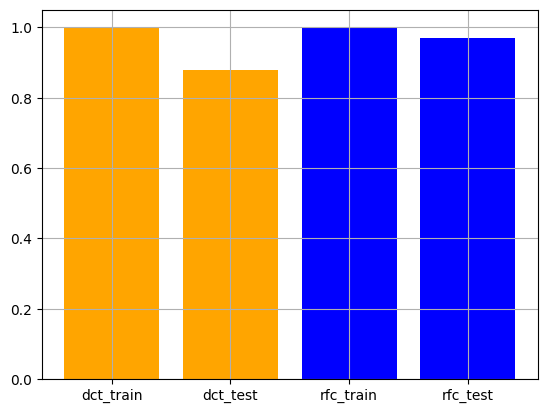

In [43]:
# 랜덤포레스트 결과를 토대로 비교 그래프 그리기
import matplotlib.pyplot as plt
# x 축 정의하기
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
# y 축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]
# 막대그래프 차트 색 정의하기
colors = ['orange', 'orange' , 'blue', 'blue']
# 막대그래프 설정하기
plt.bar(acc_list_x, acc_list_y, color=colors)
# 화면 출력하기
plt.show()

의사결정나무와 랜덤 포레스트 2가지 모델을 이용하여 결과를 비교해 보면 상대적으로 랜덤 포레스트가 의사결정나무보다 시험 데이터세트에 대한 정확도가 높은 것을 확인할 수 있습니다. <br>
AI 모델을 만드는 이유는 신규 데이터를 이용해 예측한 결과를 바탕으로 업무에 활용하고자 하는 것으로, 훈련 데이터세트(traing dataset)의 정확도도 중요하지만 훈련 데이터의 정확도가 일정 수준 이상이라면 시험 데이터세트의 정확도가 더 중요합니다. <br>
위의 실행 결과에서 볼 수 있듯이 랜덤 포레스트가 시험 데이터세트에 더 강하며, 다른 말로 표현하면 과대적합이 억제되었다고 할 수 있습니다. 

### 3) 랜덤 포레스트와 의사결정나무 비교하기
랜덤 포레스트의 하이퍼파라미터 튜닝을 통해 의사결정나무와 윳한 결과가 나올 수 있도록 실습을 진행하여 랜덤 포레스트 기반 알고리즘이 의사결정나무 기반인지 확인해 봅니다. 
랜덤 포레스트와 의사결정나무의 차이점을 이론에서 유추해 보면 다음과 같습니다. 

  1. 부트스트래핑 활용 유무
  2. 모델의 결합

실습을 통해 랜덤 포레스트 모델의 부트스트래핑 활용을 제안하고, 모델의 개수를 1개로 지정하여 의사결정나무의 형태로 생성한 후 결과를 확인해 봅니다. 

In [45]:
# 의사결정나무 결과와 동일하게 랜덤포레스트 구성하기
rft = RandomForestClassifier(
    random_state=0, 
    # 나무 개수를 1개로 설정하기
    n_estimators=1,
    # max_feature는 의사결정나무 기준으로 변경하기
    max_features=None,
    # 부트스트랩 샘플링은 OFF하기
    bootstrap=False,
)
rft.fit(X_train, y_train)

# 학습 결과 저장하기
acc_train_rfc = rft.score(X_train,y_train)
acc_test_rfc = rft.score(X_test,y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

#의사결정나무 & 랜덤포레스트가 유사한 결과를 출력하는지 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤포레스트: train_acc = 1.0, test_acc = 0.877


하이퍼파라미터를 의사결정나무 형태로 조정하여 의사결정나무와 유사한 결과를 도출한 것을 통해 랜덤 포레스트가 의사결정나무 기반의 앙상블 모델임을 확인할 수 있습니다. 

## 7. 그래디언트 부스팅
### 1) 그래디언트 부스팅 이해하기
그래디언트 부스팅(Gradient Boosting)은 부스팅 계열의 알고리즘으로, 트리 기반의 모델을 직렬로 연결하여 앞선 모델이 예측한 것 중 틀린 데이터에 가중치를 부여하여 더 잘 학습되도록 하는 알고리즘입니다. 다음 예시를 통해 그래디언트 부스팅 학습 진행 방법을 알아봅니다. 


파란 선은 의사결정나무로 1회 학습한 결과이고 회색 점은 데이터입니다. 파란 선 기준으로 아래쪽과 차이가 크다는 것을 확인할 수 있습니다. 각 모델마다 세부적인 것은 다를지라도 전반적인 부스팅 계열의 알고리즘은 이 차이를 줄이는 방향으로 학습을 진행합니다. 

부스팅을 통해 의사결정나무 기반으로 계속 학습했을 때 파란 선(모델)과 데이터의 간격이 조금씩 줄어드는 것을 볼 수 있습니다. 배깅의 경우 병렬로 학습이 진행되기 때문에 각각의 모델 생성이 가능하지만, 부스팅 계열 알고리즘은 순차적으로 학습이 진행될 수밖에 없습니다. 그래서 배깅 알고리즘 대비 부스팅 알고리즘이 기본적으로 더 오랜 시간 학습을 진행하게 됩니다. 하지만 부스팅 계열 알고리즘은 앞선 모델을 개선하는 방향으로 학습하기 때문에 어려운 데이터에 대해 좀 더 좋은 성능을 가진 모델을 만들어낼 수 있습니다. <br>
그래디언트 부스팅은 좋은 성능을 지니며, 다른 트리 기반 모델과 마찬가지로 특성의 스케일을 조정하지 않아도 되고 이진 분류나 연속적인 수치 예측에서도 잘 작동한다는 장점이 있습니다. 하지만 트리 기반 모델의 특성상 희소한 고차원 데이터에서는 잘 작동하지 않습니다. 또한 학습할 때 하이퍼파라미터를 잘 조정해야 하며, 훈련 시간이 오래 걸린다는 단점이 있습니다. 

### 2) 그래디언트 부스팅 실습하기
그래디언트 부스팅은 sklearn 라이브러리의 ensemble 서브패키지 GradientBoostingClassfier(GradientBoostingRegressor) 클래스로 사용할 수 있습니다. 그래디언트 부스팅의 주요 하이퍼파라미터는 다음과 같습니다.


> <div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
    * learning_rate：학습률. 너무 큰 학습률은 성능을 떨어뜨리고, 너무 작은 학습률은 학습이 느리게 되어 적절한 값을 찾아야 함. n_estimators와 같이 튜닝, default=0.1<br>
    * n_estimators：부스팅 스테이지 수. default=100<br>(* 그래디언트 부스팅은 n_estimators가 커질수록 과대적합 확률이 높음)<br>
    * max_depth：트리의 깊이, 과대적합 방지용. default=3<br>
    * subsample：샘플 사용 비율, 과대적합 방지용. default=10<br>
    * max_features：최대로 사용할 featura의 비율, 과대적합 방지용. default=1.0
</div>

이제 그래디언트 부스팅을 Mnist 데이터에 적용해 다른 알고리즘과 비교해 봅니다. 이때 그래디언트 부스팅과 같은 트리 기반의 알고리즘인 의사결정나무와 랜덤포레스트를 Mnist 데이터에 함께 적용해 성능을 비교해 봅니다. 

**Mnist(Modified National Institute of Standards and Technology)는?** <br>
딥러닝을 공부할 때 가장 많이 나오는 데이터세트 중 하나입니다. 데이터의 구조는 숫자 0~9까지 손글씨 이미지의 집합이며 학습 데이터 6만 개, 테스트 데이터 1만 개로 구성되어 있습니다. 이때 각각의 이미지는 28×28 크기입니다. 이 과정에서는 이미지 데이터도 reshape로 변형하여 머신러닝을 적용할 수 있음을 학습하기 위해 해당 데이터를 활용했습니다. 

#### (1) 데이터 준비하기

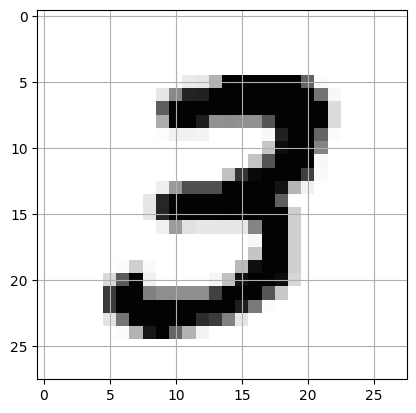

In [46]:
# tensorflow에서 데이터 불러오기
from tensorflow.keras.datasets.mnist import load_data
# 그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = load_data()

# 학습시간 고려해서 2000건 데이터만 사용하기
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:2000]
y_test = y_test[:2000]

# 샘플 데이터 확인하기
plt.imshow(x_train[7], cmap='Greys')
plt.show()

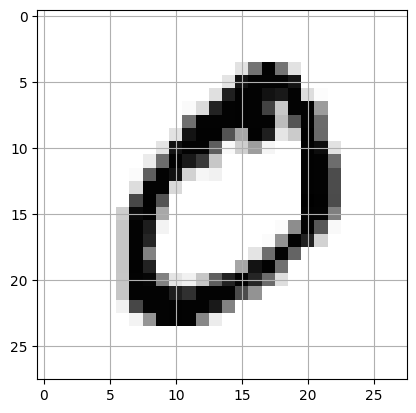

In [47]:
# 샘플 데이터 확인하기
plt.imshow(x_train[1], cmap='Greys')
plt.show()

#### (2) 알고리즘 별 학습 및 결과 비교하기

In [49]:
print(X_train.shape)
print(y_train.shape)


(60000, 784)
(2000,)


In [48]:
# 의사결정나무, 랜덤포레스트, 그라디언트부스팅 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 의사결정나무 불러오기 및 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

# 의사결정나무 학습 결과 저장하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

# 랜덤포레스트 불러오기 및 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# 랜덤포레스트 학습 결과 저장하기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

# 그라디언트부스팅 불러오기 및 학습하기
gbc = GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(X_train, y_train)

# 그라디언트부스팅 학습 결과 저장하기
acc_train_gbc = gbc.score(X_train,y_train)
acc_test_gbc = gbc.score(X_test,y_test)

# 각 알고리즘별 성능 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")
print(f"""그라디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}""")

ValueError: Number of labels=2000 does not match number of samples=60000